# Building a linear Regression Model

Constructing a linear regression model utilizing TensorFlow Core APIs involves the following equation {cite:p}`TensorFlowDocumentation`:

\begin{equation}
\mathrm{Y} = \mathrm{X}w + b
\end{equation}

Where:
* $\underset{m\times 1}{\mathrm{Y}}$: Target vector
* $\underset{m\times n}{\mathrm{X}}$: Feature matrix
* $\underset{n\times 1}{w}$: Weight vector
* $b$: Bias

By using the code with `@tf.function`, the corresponding Python code is traced to generate an executable TensorFlow graph. This approach offers advantages such as facilitating model saving and loading post-training, as well as potential performance enhancements for complex models with numerous layers and intricate operations {cite:p}`TensorFlowDocumentation`.

`````{admonition} Note
:class: warning
You can establish a computational graph in the model shown above by incorporating the `@tf.function` decorator. This decorator signals that the code should be executed within the context of a TensorFlow graph. The decorated method, typically named `__call__`, will be traced to generate an optimized graph representation, contributing to improved execution speed and enhanced performance {cite:p}`TensorFlowDocumentation`.

`````

Here's a brief outline of how the code could be structured:

In [1]:
import tensorflow as tf

# Set a random seed for reproducible results
tf.random.set_seed(22)

class LinearRegression(tf.Module):
    """
    A simple linear regression model implemented using TensorFlow.
    """

    def __init__(self):
        """
        Initializes the LinearRegression model.
        """
        self.built = False

    @tf.function
    def __call__(self, x):
        """
        Computes the linear regression output for the given input.

        Args:
            x (tf.Tensor): Input tensor.

        Returns:
            tf.Tensor: Output tensor after linear regression.
        """
        # Initialize the model parameters on the first call
        if not self.built:
            # Randomly generate the weight vector and bias term
            rand_w = tf.random.uniform(shape=[x.shape[-1], 1])
            rand_b = tf.random.uniform(shape=[])

            # Define and initialize the weight and bias variables
            self.w = tf.Variable(rand_w, name="weights")
            self.b = tf.Variable(rand_b, name="bias")

            # Mark the model as built
            self.built = True

        # Perform linear regression
        y = tf.add(tf.matmul(x, self.w), self.b)

        # Squeeze the output tensor to remove unnecessary dimensions
        return tf.squeeze(y, axis=1)

Let's break down the code step by step:

```python
class LinearRegression(tf.Module):

    def __init__(self):
        self.built = False
```

- This code defines a Python class named `LinearRegression` that inherits from `tf.Module`. This class represents a linear regression model.
- The `__init__` method initializes the object's state. It sets `self.built` to `False`. This flag will be used to track whether the model's parameters have been initialized.

```python
    @tf.function
    def __call__(self, x):
        # Initialize the model parameters on the first call
        if not self.built:
            # Randomly generate the weight vector and bias term
            rand_w = tf.random.uniform(shape=[x.shape[-1], 1])
            rand_b = tf.random.uniform(shape=[])
            self.w = tf.Variable(rand_w, name="weights")
            self.b = tf.Variable(rand_b, name="bias")
            self.built = True
        y = tf.add(tf.matmul(x, self.w), self.b)
        return tf.squeeze(y, axis=1)
```

- The `@tf.function` decorator is applied to the `__call__` method. This decorator traces the method's computation and generates an optimized TensorFlow graph for faster execution.
- The `__call__` method takes an input tensor `x`, representing the input features for the linear regression model.
- Inside the method, there's a conditional check using `self.built`. This check ensures that the model's parameters (`w` and `b`) are initialized only once, on the first call.
- If `self.built` is `False`, the weight vector `w` and bias term `b` are randomly generated using `tf.random.uniform` and assigned as `tf.Variable` instances.
- The `tf.squeeze` function is used to remove dimensions of size 1 from the tensor `y`, resulting in a 1D tensor representing the model's predictions.
- The computed predictions are returned as the output of the method.

Overall, this code defines a `LinearRegression` class with an `__init__` method for parameter initialization and a `__call__` method for making predictions using the linear regression model. The decorator `@tf.function` optimizes the execution of the `__call__` method by generating a TensorFlow graph.

<font color='Blue'><b>Example:</b></font>
The Auto MPG dataset, available at [https://archive.ics.uci.edu/dataset/9/auto+mpg](https://archive.ics.uci.edu/dataset/9/auto+mpg), is a well-known and widely used collection of automotive data hosted by the UCI Machine Learning Repository. It offers a comprehensive exploration into the fuel efficiency of automobiles manufactured during the late 1970s and early 1980s. The dataset encompasses diverse quantitative and categorical attributes that encompass key automotive characteristics such as the number of cylinders, displacement, horsepower, and weight. With a goal of predicting fuel efficiencies, the Auto MPG dataset serves as an invaluable resource for developing and assessing predictive models in the field of automotive engineering and data science. Due to its rich and diverse attributes, it remains a popular choice for educational purposes, research, and practical applications in machine learning and data analysis.

| Column Name    | Description                                                                                                      |
|----------------|------------------------------------------------------------------------------------------------------------------|
| mpg            | Miles per gallon (MPG) is a measure of fuel efficiency, representing the number of miles a vehicle can travel per gallon of fuel. It serves as the target variable for prediction.                           |
| cylinders      | The number of cylinders in the engine of the vehicle.                                                           |
| displacement   | Engine displacement is the volume of air and fuel that an engine can pump in and out over a single cycle. It's typically measured in cubic inches or cubic centimeters.                            |
| horsepower     | The power produced by the engine, measured in horsepower.                                                      |
| weight         | The weight of the vehicle, including its own mass and additional load, measured in pounds.                    |
| acceleration   | Acceleration measures how quickly a vehicle can increase its speed. It's often measured as the time taken to accelerate from 0 to 60 miles per hour.        |
| model year     | The year in which the vehicle model was manufactured. It's often represented as the last two digits of the year (e.g., 80 for 1980).                               |
| origin         | The origin of the vehicle's manufacturer. It's represented as an integer value, where 1 represents North America, 2 represents Europe, and 3 represents Asia.                   |
| car name       | The name of the car model.                                                                                        |

The dataset may include instances with missing values. It's crucial to address this by eliminating any rows containing missing values using the `pandas.DataFrame.dropna` function. After handling missing values, the dataset should be converted into a `tf.float32` tensor type to ensure uniform data representation. This conversion can be achieved by using the `tf.convert_to_tensor` function to transform the cleaned dataset, followed by the `tf.cast` function to ensure the data is represented in the desired data type. This preparation process ensures that the dataset is ready for further analysis, model training, and optimization {cite:p}`TensorFlowDocumentation`.

In [2]:
import pandas as pd
import tensorflow as tf

# Load the dataset from the specified URL and define column names
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

# Read the dataset using pandas, handling missing values
dataset = pd.read_csv(url, names=column_names, na_values='?',
                      comment='\t', sep=' ', skipinitialspace=True)
dataset = dataset.dropna()

# Convert the cleaned dataset to a TensorFlow float32 tensor
dataset_tf = tf.convert_to_tensor(dataset, dtype=tf.float32)

# Display the tail of the dataset for verification
display(dataset.tail())

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


Next, proceed to split the dataset into training and test sets. It's essential to ensure an unbiased split by shuffling the dataset using the `tf.random.shuffle` function. This step helps prevent any inadvertent ordering or structure from influencing the data distribution between the training and test sets {cite:p}`TensorFlowDocumentation`.

In [3]:
# Shuffle the dataset to ensure unbiased splits
dataset_shuffled = tf.random.shuffle(dataset_tf, seed=22)

# Split the shuffled dataset into training and test sets
train_data, test_data = dataset_shuffled[100:], dataset_shuffled[:100]

# Separate features (x) and target labels (y) for both training and test sets
x_train, y_train = train_data[:, 1:], train_data[:, 0]
x_test, y_test = test_data[:, 1:], test_data[:, 0]

In this code snippet, the shuffled dataset is created using `tf.random.shuffle` with a specified seed to ensure reproducibility. The dataset is then split into training and test sets using slicing. The features (x) and target labels (y) are separated for both the training and test sets. This prepares the data for further processing and model training.

Proceed with basic feature engineering by performing one-hot encoding on the `"Origin"` feature. Utilize the `tf.one_hot` function to effectively transform this categorical column into three distinct binary columns, each corresponding to a specific origin category. This step enables the model to properly interpret and utilize the categorical information during training and inference {cite:p}`TensorFlowDocumentation`.

In [4]:
def onehot_origin(x):
    # Extract the "Origin" column and cast it to integer
    origin = tf.cast(x[:, -1], tf.int32)

    # Apply one-hot encoding to the "Origin" column
    origin_oh = tf.one_hot(origin - 1, 3)  # Adjust for 1-indexed feature

    # Concatenate the one-hot encoded columns with the remaining features
    x_ohe = tf.concat([x[:, :-1], origin_oh], axis=1)
    return x_ohe

# Apply one-hot encoding to the "Origin" feature for both training and test sets
x_train_ohe, x_test_ohe = onehot_origin(x_train), onehot_origin(x_test)

# Display the numpy representation of the one-hot encoded training features
print("One-Hot Encoded Training Features:")
print(x_train_ohe.numpy())

One-Hot Encoded Training Features:
[[  4. 140.  72. ...   1.   0.   0.]
 [  4. 120.  74. ...   0.   0.   1.]
 [  4. 122.  88. ...   0.   1.   0.]
 ...
 [  8. 318. 150. ...   1.   0.   0.]
 [  4. 156. 105. ...   1.   0.   0.]
 [  6. 232. 100. ...   1.   0.   0.]]


In this code snippet, the `onehot_origin` function takes a feature matrix as input, extracts the "Origin" column, and applies one-hot encoding using `tf.one_hot`. The resulting one-hot encoded columns are concatenated with the remaining features, resulting in the transformed feature matrix. The function is then applied to both the training and test sets. Finally, the numpy representation of the one-hot encoded training features is displayed for verification.

In this example, the problem involves multiple regression with predictors or features that vary significantly in scales. To mitigate the impact of these scale differences, it's advantageous to standardize the data. This process ensures that each feature has a mean of zero and a standard deviation of one. Achieve standardization using the `tf.reduce_mean` and `tf.math.reduce_std` functions. Furthermore, when making predictions with the regression model, the unstandardization process can be applied to obtain predictions in terms of the original units, allowing for better interpretability {cite:p}`TensorFlowDocumentation`.

In [5]:
class Normalize(tf.Module):
    def __init__(self, x):
        # Initialize the mean and standard deviation for normalization
        self.mean = tf.math.reduce_mean(x, axis=0)
        self.std = tf.math.reduce_std(x, axis=0)

    def norm(self, x):
        # Normalize the input by subtracting mean and dividing by standard deviation
        return (x - self.mean) / self.std

    def unnorm(self, x):
        # Unnormalize the input by reversing the normalization process
        return (x * self.std) + self.mean

In this code snippet, the `Normalize` class is defined, which is responsible for both normalization (`norm`) and unnormalization (`unnorm`) operations. During initialization, the mean and standard deviation of the input data are computed along each feature axis. The `norm` method standardizes the input data by subtracting the mean and dividing by the standard deviation, while the `unnorm` method reverses the normalization process to obtain data in the original units. This class facilitates preprocessing the data for training and reverting predictions to the original scale for better interpretability.

`````{admonition} Remark
:class: important

Normalizing data involves transforming the values of a dataset to have a specific scale or distribution. The purpose of normalization is to ensure that different features or variables are on a similar scale, which can help improve the performance and convergence of machine learning models. Mathematically, data normalization typically involves two steps: subtracting the mean ($\mu$) and dividing by the standard deviation ($\sigma$).

Given a dataset with a feature (column) of values $x$, the normalization process can be described as follows:

1. **Calculate Mean and Standard Deviation**: Compute the mean ($\mu$) and the standard deviation ($\sigma$) of the feature $x$ across all instances in the dataset.

2. **Subtract Mean**: Subtract the mean from each individual value in the feature `x`. This centers the values around zero, making the mean of the normalized values close to zero.
\begin{equation}
\text{Normalized Value} = x - \mu
\end{equation}
3. **Divide by Standard Deviation**: Divide the centered values by the standard deviation. This step scales the values to have a unit variance.
\begin{equation}
\text{Normalized Value} = \frac{x - \mu}{\sigma}
\end{equation}
The result is a new set of values that have zero mean and unit variance. Normalized data tends to have a distribution that is approximately centered around zero, and its range is constrained, which can be particularly useful for machine learning algorithms that are sensitive to the scale of features.

In the context of the TensorFlow code snippet, the `Normalize` class performs these mathematical operations to normalize and unnormalize the data. The `norm` method subtracts the mean and divides by the standard deviation, while the `unnorm` method reverses this process to obtain values in the original scale. This preprocessing step ensures that the features and target values are in a consistent and appropriate range for training and evaluation.

`````

In [6]:
# Create Normalization instances for input features and target values
norm_x = Normalize(x_train_ohe)
norm_y = Normalize(y_train)

# Normalize the training and test data
x_train_norm, y_train_norm = norm_x.norm(x_train_ohe), norm_y.norm(y_train)
x_test_norm, y_test_norm = norm_x.norm(x_test_ohe), norm_y.norm(y_test)

In this code snippet, `Normalize` instances are created for both input features (`norm_x`) and target values (`norm_y`). These instances encapsulate the mean and standard deviation calculated during initialization, allowing for consistent normalization and unnormalization operations. The training and test data are then normalized using the respective normalization instances. The normalized data is used for model training and evaluation, promoting stable convergence and accurate evaluation of the model's performance.

Now, using `LinearRegression` module:

In [7]:
# Create an instance of the LinearRegression model
lin_reg = LinearRegression()

# Get a prediction for the first example in the normalized training data
prediction = lin_reg(x_train_norm[:1])

# Unnormalize the prediction using the y_normalizer's unnormalize method
prediction_unnorm = norm_y.unnorm(prediction)

# Print the unnormalized prediction
print("Unnormalized Prediction:", prediction_unnorm.numpy())

Unnormalized Prediction: [6.8007298]


In this code, we utilize the previously created `LinearRegression` model to generate a prediction for the first example in the normalized training data `x_train_norm`. The prediction is then unnormalized using the `unnorm` method from the `Normalize` instance `norm_y`. The resulting unnormalized prediction is printed to the console, providing an MPG estimate in the original, interpretable units.

## Define a Loss Function

In the context of training a machine learning model, it's crucial to define a suitable loss function that quantifies how well the model's predictions align with the true target values. For regression tasks involving continuous outputs, the mean squared error (MSE) serves as a well-suited choice for the loss function {cite:p}`TensorFlowDocumentation`.

The MSE, as expressed by the equation below, measures the average squared difference between the predicted values, denoted as $\hat{y}$, and the actual target values, represented by $y$:

\begin{equation}
MSE = \frac{1}{m}\sum_{i=1}^{m}(\hat{y}_i - y_i)^2
\end{equation}

Here:

- $\hat{y}$ represents the vector of model predictions.
- $y$ represents the vector of true target values.

The primary objective in this regression problem is to discover the optimal weight vector, denoted as $w$, and bias term, denoted as $b$, that collectively minimize the value of the MSE loss function. This process guides the model to produce predictions that align closely with the actual target values, thus enhancing its predictive capability {cite:p}`TensorFlowDocumentation`.

In [8]:
def mse_loss(y_pred, y):
    # Calculate the mean squared error loss
    loss = tf.reduce_mean(tf.square(y_pred - y))
    return loss

This function computes the mean squared error loss between the predicted values (`y_pred`) and the actual target values (`y`). The squared differences between the predicted and actual values are averaged across all examples in the dataset, resulting in the mean squared error. The lower the value of the loss, the closer the model's predictions are to the true targets.

## Train and Evaluate Your Model

Utilizing mini-batches during training offers benefits such as memory efficiency and accelerated convergence. The `tf.data.Dataset` API provides valuable functions for both batching and shuffling your data. This API empowers you to construct intricate input pipelines using modular and reusable components. You can delve deeper into constructing TensorFlow input pipelines by referring to [this guide](https://www.tensorflow.org/guide/data). This approach enhances the efficiency of data processing and helps streamline your training process {cite:p}`TensorFlowDocumentation`.

In [9]:
batch_size = 64

# Create training dataset with shuffling and batching
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_norm, y_train_norm))
train_dataset = train_dataset.shuffle(buffer_size=x_train_norm.shape[0]).batch(batch_size)

# Create test dataset with shuffling and batching
test_dataset = tf.data.Dataset.from_tensor_slices((x_test_norm, y_test_norm))
test_dataset = test_dataset.shuffle(buffer_size=x_test_norm.shape[0]).batch(batch_size)

These lines efficiently create `tf.data.Dataset` objects for training and testing by using `from_tensor_slices` to create slices from tensors, followed by shuffling and batching operations to enhance the learning process.

Next, implement a training loop to iteratively update the model's parameters using the MSE loss function and its gradients with respect to the input parameters. This iterative process is known as [gradient descent](https://developers.google.com/machine-learning/glossary#gradient-descent). In each iteration, the model's parameters are adjusted by taking a step in the opposite direction of their computed gradients. The step size is controlled by the learning rate, a tunable hyperparameter. Remember that the gradient points towards the direction of the steepest ascent, so moving in the opposite direction helps minimize the MSE loss function and improve the model's accuracy.

```{admonition} Gradient Descent

Gradient descent is a mathematical optimization technique used to minimize a function, typically a loss function in the context of machine learning. Let's break down the mathematical formulation {cite:p}`deisenroth2020mathematics,lin2020accelerated`:

1. **Objective Function**: In the context of machine learning, we have a model that makes predictions based on some parameters. These predictions are compared to the actual targets using a loss function that measures the difference between predicted and actual values.

2. **Loss Function**: The loss function quantifies how well the model is performing. The goal is to minimize this function by adjusting the model's parameters.

3. **Gradient**: The gradient of a function indicates its steepest ascent. It's a vector that points in the direction of the greatest increase in the function. Mathematically, for a scalar function $f(x)$ with respect to a vector x, the gradient is denoted as $\nabla f(x)$ and computed by taking the partial derivatives of $f(x)$ with respect to each element of $x$.

4. **Gradient Descent Step**: The idea behind gradient descent is to iteratively update the parameters in the direction of the negative gradient. This means moving in the direction of steepest decrease in the function to reach a minimum. The update equation for a parameter $w$ is:

\begin{equation}
w_{\text{new}} = w_{\text{old}} - \text{learning_rate} \cdot \nabla f(w_{\text{old}})
\end{equation}

where:
- $w_{\text{old}}$ is the current value of the parameter.
- $\nabla f(w_{\text{old}})$ is the gradient of the loss function at the current parameter values.
- $\text{learning_rate}$ is a hyperparameter that controls the step size. It's a small positive value.

5. **Iterations**: The process is repeated for a certain number of iterations or until a stopping criterion is met. The parameters are updated in each iteration, gradually reducing the loss and bringing the model closer to the optimal parameter values.

```

In [10]:
# Set training parameters
epochs = 100
learning_rate = 0.01
train_losses, test_losses = [], []

# Format training loop
for epoch in range(epochs):
    batch_losses_train, batch_losses_test = [], []

    # Iterate through the training data
    for x_batch, y_batch in train_dataset:
        with tf.GradientTape() as tape:
            y_pred_batch = lin_reg(x_batch)
            batch_loss = mse_loss(y_pred_batch, y_batch)
        # Update parameters with respect to the gradient calculations
        grads = tape.gradient(batch_loss, lin_reg.variables)
        for g, v in zip(grads, lin_reg.variables):
            v.assign_sub(learning_rate * g)
        # Keep track of batch-level training performance
        batch_losses_train.append(batch_loss)

    # Iterate through the testing data
    for x_batch, y_batch in test_dataset:
        y_pred_batch = lin_reg(x_batch)
        batch_loss = mse_loss(y_pred_batch, y_batch)
        # Keep track of batch-level testing performance
        batch_losses_test.append(batch_loss)

    # Keep track of epoch-level model performance
    train_loss = tf.reduce_mean(batch_losses_train)
    test_loss = tf.reduce_mean(batch_losses_test)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    if epoch % 10 == 0:
        print(f'Mean Squared Error (MSE) for step {epoch}: {train_loss.numpy():0.3f}')

# Output final losses
print(f"\nFinal train loss: {train_loss:0.3f}")
print(f"Final test loss: {test_loss:0.3f}")

Mean Squared Error (MSE) for step 0: 2.866
Mean Squared Error (MSE) for step 10: 0.453
Mean Squared Error (MSE) for step 20: 0.285
Mean Squared Error (MSE) for step 30: 0.231
Mean Squared Error (MSE) for step 40: 0.209
Mean Squared Error (MSE) for step 50: 0.203
Mean Squared Error (MSE) for step 60: 0.194
Mean Squared Error (MSE) for step 70: 0.184
Mean Squared Error (MSE) for step 80: 0.186
Mean Squared Error (MSE) for step 90: 0.176

Final train loss: 0.177
Final test loss: 0.157


In this code snippet, we set up a training loop to iterate through a specified number of epochs. For each epoch, we loop through the training data in batches, calculate the mean squared error loss using the defined `mse_loss` function, and use the `tf.GradientTape` context to compute the gradients with respect to the model's variables. We then update the model's variables using the gradients and learning rate. The training and testing losses for each batch are recorded, and at the end of each epoch, the mean losses are computed and appended to the `train_losses` and `test_losses` lists. Finally, the code outputs the final training and testing losses. This loop represents the iterative process of gradient descent for training the model.

It shows the mean squared error (MSE) values for different training iterations (or steps) as well as the final train and test loss.

- The "Mean Squared Error (MSE) for step X" lines illustrate the MSE values at various training steps. A lower MSE indicates closer predicted values to the actual target values. It's apparent that the MSE initially starts relatively high and then consistently decreases with each training iteration, indicating that the model's predictions are improving over time.

- The "Final train loss" denotes the average MSE over the entire training dataset after all training iterations. Here, the final train loss is 0.177. This figure represents the average squared difference between the predicted and true target values across the entire training dataset.

- The "Final test loss" signifies the average MSE over the test dataset, which contains data the model has not encountered during training. The recorded test loss is 0.176, indicating that the model performs reasonably well on unseen data.

The decreasing MSE values during training and the relatively low final train and test losses underscore the linear regression model's ability to make accurate predictions on the given dataset. These results highlight the model's capacity to generalize and perform well on new, unseen data as well.

Visualizing the changes in Mean Squared Error (MSE) loss over time can provide insights into how your model is improving during training. By plotting the loss values across iterations, you can track the convergence and optimization progress.

It's important to note that while the training loss decreases, the model's performance on a designated validation or test set may not always follow the same trend. The validation set helps to evaluate the model's ability to generalize to new, unseen data. If the training loss decreases while the validation loss increases, it could be an indication of overfitting, where the model is learning to fit the noise in the training data rather than capturing the underlying patterns.

Using a validation set to monitor the model's performance during training is essential to make informed decisions about stopping the training process and selecting the best model configuration. It ensures that the model is achieving good generalization and is not simply memorizing the training data.

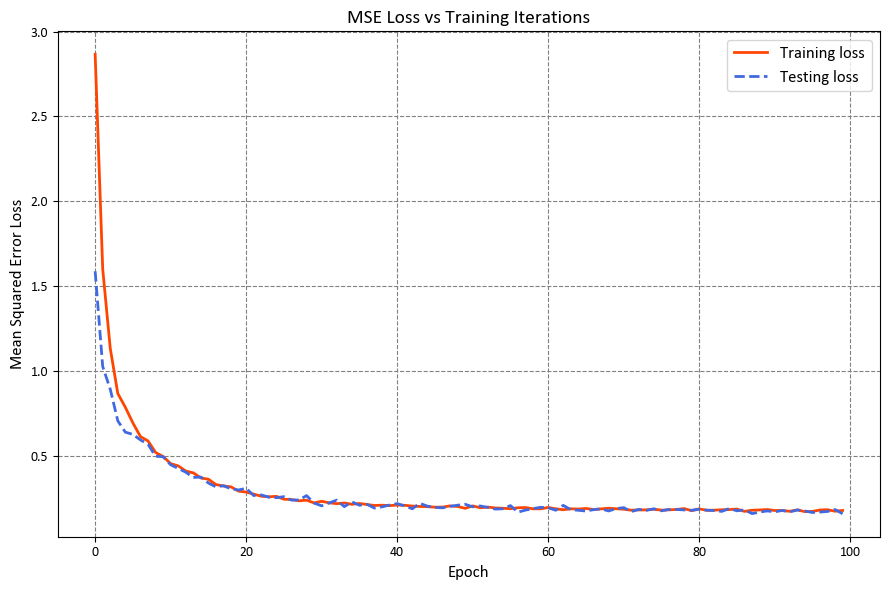

In [11]:
import matplotlib.pyplot as plt
plt.style.use('../mystyle.mplstyle')

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(range(epochs), train_losses, label="Training loss", linewidth=2, color='OrangeRed', linestyle='-')
ax.plot(range(epochs), test_losses, label="Testing loss", linewidth=2, color='RoyalBlue', linestyle='--')
ax.set(xlabel="Epoch", ylabel="Mean Squared Error Loss", title="MSE Loss vs Training Iterations")
ax.legend(fontsize=12)
ax.title.set_fontsize(14)
ax.tick_params(axis='both', labelsize=10)
plt.tight_layout()

## Save and Load the Model

To enhance the usability of your trained model on new data, it's advantageous to develop an export module that encapsulates essential operations such as feature extraction, normalization, prediction, and unnormalization. This export module streamlines the application of your model to raw data, facilitating the acquisition of meaningful predictions {cite:p}`TensorFlowDocumentation`.

Let's navigate through the steps of crafting this export module to ensure a well-organized and straightforward process. This module will simplify the procedure of saving the trained model and subsequently loading it for predictions on fresh data. The advantage is that you won't have to manually handle feature extraction, normalization, and renormalization, making the usage of the model seamless and intuitive {cite:p}`TensorFlowDocumentation`.

In [12]:
class ExportModule(tf.Module):
    def __init__(self, model, extract_features, norm_x, norm_y):
        """
        Initialize the ExportModule.

        Args:
            model (tf.Module): Trained machine learning model.
            extract_features (callable): Feature extraction function.
            norm_x (Normalize): Input normalization instance.
            norm_y (Normalize): Output unnormalization instance.
        """
        self.model = model
        self.extract_features = extract_features
        self.norm_x = norm_x
        self.norm_y = norm_y

    @tf.function(input_signature=[tf.TensorSpec(shape=[None, None], dtype=tf.float32)])
    def __call__(self, x):
        """
        Run the ExportModule for new data points.

        Args:
            x (tf.Tensor): Input data.

        Returns:
            tf.Tensor: Predicted output.
        """
        x = self.extract_features(x)
        x = self.norm_x.norm(x)
        y = self.model(x)
        y = self.norm_y.unnorm(y)
        return y

This `ExportModule` class encapsulates the necessary operations for using the trained model on new data. It takes the trained model, feature extraction function, input normalization instance (`norm_x`), and output unnormalization instance (`norm_y`) as inputs. The `__call__` method, decorated with `@tf.function`, applies these operations to new input data (`x`) and returns the predicted output. The `input_signature` argument in the `@tf.function` decorator ensures that the input shape and data type are specified, allowing TensorFlow to optimize the function.

In [13]:
# Create an ExportModule instance for the trained linear regression model
lin_reg_export = ExportModule(model=lin_reg,
                               extract_features=onehot_origin,
                               norm_x=norm_x,
                               norm_y=norm_y)

Here, an instance of the `ExportModule` class is created to encapsulate the trained linear regression model (`lin_reg`). The `extract_features` function is set to `onehot_origin` for feature extraction, and the `norm_x` and `norm_y` instances are used for input normalization and output unnormalization, respectively. This export module can then be used to make predictions on new data points without needing to manually perform feature extraction, normalization, and unnormalization steps.

If you wish to save the current state of the model, you can utilize the `tf.saved_model.save` function. On the other hand, if you need to load a saved model for the purpose of making predictions, you can achieve this by employing the `tf.saved_model.load` function. These functions offer a convenient way to persist and retrieve models, enabling seamless integration into different workflows and scenarios {cite:p}`TensorFlowDocumentation`.

```python
import tempfile
import os

# Create a temporary directory to save the model
models = tempfile.mkdtemp()

# Define the path to save the exported model
save_path = os.path.join(models, 'lin_reg_export')

# Save the ExportModule using tf.saved_model.save
tf.saved_model.save(lin_reg_export, save_path)
```

In this code snippet, a temporary directory is created using `tempfile.mkdtemp()` to store the exported model. The `save_path` variable specifies the path where the model will be saved. Finally, the `tf.saved_model.save` function is used to save the `lin_reg_export` module to the specified path. This saved model can then be loaded for predictions using the `tf.saved_model.load` function.

```python
# Load the saved model using tf.saved_model.load
lin_reg_loaded = tf.saved_model.load(save_path)

# Make predictions on the test dataset using the loaded model
test_preds = lin_reg_loaded(x_test)

# Print the first 10 predicted values
print("First 10 predicted values:")
print(test_preds[:10].numpy())
```

```
First 10 predicted values:
[28.0975   26.193336 33.564373 27.719316 31.787922 24.014559 24.421043
 13.45958  28.562454 27.368692]
 ```

In this code snippet, the saved model is loaded using the `tf.saved_model.load` function. Then, predictions are made on the test dataset using the loaded model. Finally, the first 10 predicted values are printed to the console. This demonstrates how to use the saved model to make predictions on new data.

`````{admonition} Note
:class: warning

Saving models is crucial when working in platforms like Google Colab due to several reasons:

1. **Session Lifetime**: Colab sessions have a limited lifetime. Once the session ends, all data, variables, and models are lost. Saving your model allows you to preserve your work across sessions and avoid retraining from scratch.

2. **Resource Constraints**: Colab provides limited resources, including memory and GPU availability. Training a complex model can take a significant amount of time and resources. Saving the model allows you to resume training without starting over if the session gets disconnected or terminated.

3. **Training Time**: Training deep learning models can be time-consuming. Saving the model allows you to train it over multiple sessions and continue training where you left off.

4. **Reproducibility**: Saving the model's state ensures reproducibility. If you achieve a good model, you can save it and share it with others, allowing them to replicate your results.

5. **Deployment**: Once your model is trained, you can deploy it in various applications without needing to retrain it each time. Saving the model's architecture and weights allows you to load it on different platforms for inference.

6. **Experimentation**: When experimenting with different model architectures or hyperparameters, saving models at different stages lets you compare their performance and choose the best configuration.

By saving your model, you can effectively manage your work, continue training, and deploy models for real-world applications, even in an environment like Google Colab with session limitations.

`````